In [1]:
import csv
from classes_aplo import Metrics,VSM
from creating_aplo import creating_df
import matplotlib.pyplot as plt

csv_file_path = '/home/sarantis/Documents/InformationRetrieval/Project/colBERT.csv'

with open(csv_file_path, mode='r') as file:
    csv_reader = csv.reader(file)

    data_sets = []
    current_set = []

    for row in csv_reader:
        if not row:
            if current_set:
                data_sets.append(current_set)
                current_set = []
        else:
            current_set.append(row)

    if current_set:
        data_sets.append(current_set)

for i, data_set in enumerate(data_sets, 1):
    print(f'Set {i}: {data_set}')



Set 1: [['533', '441', '957', '484', '827', '741', '505', '960', '1201', '437'], ['437', '754', '589', '592', '151', '499', '1173', '172', '505', '1125'], ['633', '1175', '1206', '55', '856', '439', '139', '441', '137', '875'], ['604', '1039', '711', '374', '23', '876', '536', '439', '928', '1170'], ['776', '499', '501', '895', '711', '1156', '754', '568', '439', '496'], ['593', '976', '31', '533', '47', '980', '805', '441', '496', '1120'], ['441', '633', '856', '1207', '439', '437', '151', '1175', '496', '875'], ['437', '1207', '1019', '439', '956', '33', '375', '1202', '589', '567'], ['205', '165', '690', '63', '870', '414', '545', '355', '794', '720'], ['676', '1115', '1218', '878', '1106', '1066', '30', '1107', '581', '451'], ['798', '991', '796', '909', '649', '834', '96', '799', '186', '1064'], ['465', '430', '501', '140', '46', '765', '288', '960', '441', '602'], ['314', '301', '867', '1076', '1192', '278', '522', '776', '333', '658'], ['815', '899', '150', '1117', '798', '946',

In [2]:
col_BERT10=data_sets[0]
col_BERT8=data_sets[1]
col_BERT6=data_sets[2]
col_BERT4=data_sets[3]
col_BERT2=data_sets[4]
col_BERT10=[[int(element) for element in sublist] for sublist in col_BERT10]
col_BERT8=[[int(element) for element in sublist] for sublist in col_BERT8]
col_BERT6=[[int(element) for element in sublist] for sublist in col_BERT6]
col_BERT4=[[int(element) for element in sublist] for sublist in col_BERT4]
col_BERT2=[[int(element) for element in sublist] for sublist in col_BERT2]

In [3]:
df=creating_df()
vsm=VSM(df)

In [4]:
VsmList1,VsmList2=vsm.get_res()

Three largest values:
 Document
00533    0.187974
00437    0.143790
00568    0.133481
00741    0.121202
00392    0.117687
00975    0.117655
00827    0.115244
00957    0.114369
00499    0.112920
00439    0.109798
dtype: float64
Indices of three largest values: Index(['00533', '00437', '00568', '00741', '00392', '00975', '00827', '00957',
       '00499', '00439'],
      dtype='object', name='Document')
Three largest values:
 Document
00498    0.062029
00484    0.048874
00856    0.048205
00533    0.040250
00437    0.035123
00441    0.034798
00302    0.032031
00439    0.031264
00526    0.030726
00711    0.028675
dtype: float64
Indices of three largest values: Index(['00498', '00484', '00856', '00533', '00437', '00441', '00302', '00439',
       '00526', '00711'],
      dtype='object', name='Document')
Three largest values:
 Document
00980    0.161685
00754    0.145781
00498    0.118981
00592    0.114537
01197    0.108940
00189    0.101427
00265    0.099219
00733    0.094639
00041    0.09414

In [5]:
def cut_list(lists):
    lists8=[]
    lists6=[]
    lists4=[]
    lists2=[]
    for item in lists:
       lists8.append(item[:8])
       lists6.append(item[:6])
       lists4.append(item[:4])
       lists2.append(item[:2])
    return lists8,lists6,lists4,lists2 

VsmList1_8,VsmList1_6,VsmList1_4,VsmList1_2 = cut_list(VsmList1)
VsmList2_8,VsmList2_6,VsmList2_4,VsmList2_2 = cut_list(VsmList2)

In [6]:
colbert_presicion=[]
colbert_recall=[]
colbert_hm=[]
vsm1_presicion=[]
vsm1_recall=[]
vsm1_hm=[]
vsm2_presicion=[]
vsm2_recall=[]
vsm2_hm=[]

def metrics_creator(i,l):
    met=Metrics(i,l)
    return met.precision(),met.recall(),met.MesiArmonikiTimi()


pre,re,hm=metrics_creator(10,col_BERT10)
colbert_presicion.append(pre)
colbert_recall.append(re)
colbert_hm.append(hm)
pre,re,hm=metrics_creator(8,col_BERT8)
colbert_presicion.append(pre)
colbert_recall.append(re)
colbert_hm.append(hm)
pre,re,hm=metrics_creator(6,col_BERT6)
colbert_presicion.append(pre)
colbert_recall.append(re)
colbert_hm.append(hm)
pre,re,hm=metrics_creator(4,col_BERT4)
colbert_presicion.append(pre)
colbert_recall.append(re)
colbert_hm.append(hm)
pre,re,hm=metrics_creator(2,col_BERT2)
colbert_presicion.append(pre)
colbert_recall.append(re)
colbert_hm.append(hm)

pre,re,hm=metrics_creator(10,VsmList1)
vsm1_presicion.append(pre)
vsm1_recall.append(re)
vsm1_hm.append(hm)
pre,re,hm=metrics_creator(8,VsmList1_8)
vsm1_presicion.append(pre)
vsm1_recall.append(re)
vsm1_hm.append(hm)
pre,re,hm=metrics_creator(6,VsmList1_6)
vsm1_presicion.append(pre)
vsm1_recall.append(re)
vsm1_hm.append(hm)
pre,re,hm=metrics_creator(4,VsmList1_4)
vsm1_presicion.append(pre)
vsm1_recall.append(re)
vsm1_hm.append(hm)
pre,re,hm=metrics_creator(2,VsmList1_2)
vsm1_presicion.append(pre)
vsm1_recall.append(re)
vsm1_hm.append(hm)

pre,re,hm=metrics_creator(10,VsmList2)
vsm2_presicion.append(pre)
vsm2_recall.append(re)
vsm2_hm.append(hm)
pre,re,hm=metrics_creator(8,VsmList2_8)
vsm2_presicion.append(pre)
vsm2_recall.append(re)
vsm2_hm.append(hm)
pre,re,hm=metrics_creator(6,VsmList2_6)
vsm2_presicion.append(pre)
vsm2_recall.append(re)
vsm2_hm.append(hm)
pre,re,hm=metrics_creator(4,VsmList2_4)
vsm2_presicion.append(pre)
vsm2_recall.append(re)
vsm2_hm.append(hm)
pre,re,hm=metrics_creator(2,VsmList2_2)
vsm2_presicion.append(pre)
vsm2_recall.append(re)
vsm2_hm.append(hm)


The precision metric of the model is: 0.43000000000000005 


The recall metric of the model is: 0.1488415687989231 


The precision metric of the model is: 0.43000000000000005 


The recall metric of the model is: 0.1488415687989231 


The precision metric of the model is: 0.45 


The recall metric of the model is: 0.13059524491776683 


The precision metric of the model is: 0.45 


The recall metric of the model is: 0.13059524491776683 


The precision metric of the model is: 0.475 


The recall metric of the model is: 0.10793091557664909 


The precision metric of the model is: 0.475 


The recall metric of the model is: 0.10793091557664909 


The precision metric of the model is: 0.5 


The recall metric of the model is: 0.07491126033768813 


The precision metric of the model is: 0.5 


The recall metric of the model is: 0.07491126033768813 


The precision metric of the model is: 0.575 


The recall metric of the model is: 0.040825846802224806 


The precision metric of the model 

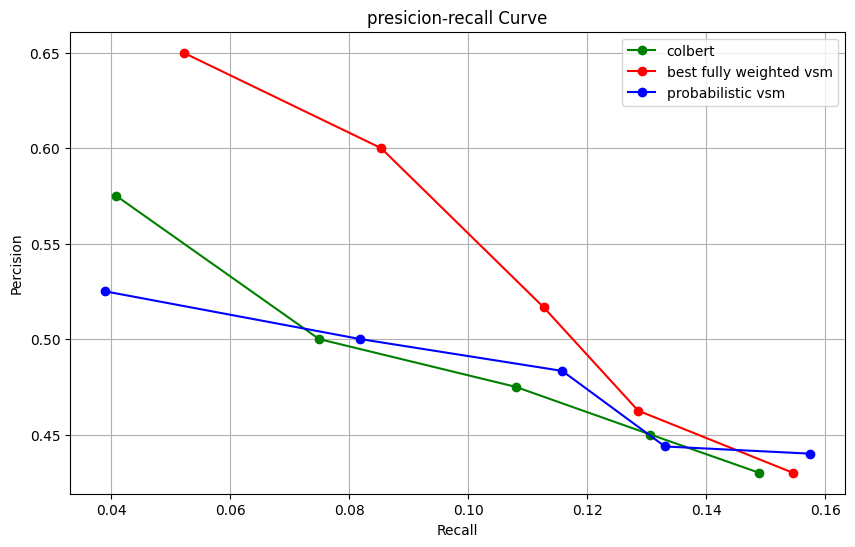

In [7]:
plt.figure(figsize=(10, 6))
plt.title('presicion-recall Curve')

plt.plot(colbert_recall, colbert_presicion,marker='o', color='green',label='colbert')
plt.plot(vsm1_recall,vsm1_presicion,marker='o', color='red', label='best fully weighted vsm')
plt.plot(vsm2_recall,vsm2_presicion,marker='o', color='blue', label='probabilistic vsm')
plt.plot
plt.legend()
plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Percision')
plt.show()

In [8]:
colbert=Metrics(10,col_BERT10)
colbert_dcg=colbert.calculate_ndcg()
vsm1_met=Metrics(10,VsmList1)
vsm1_dcg=vsm1_met.calculate_ndcg()
vsm2_met=Metrics(10,VsmList2)
vsm2_dcg=vsm2_met.calculate_ndcg()



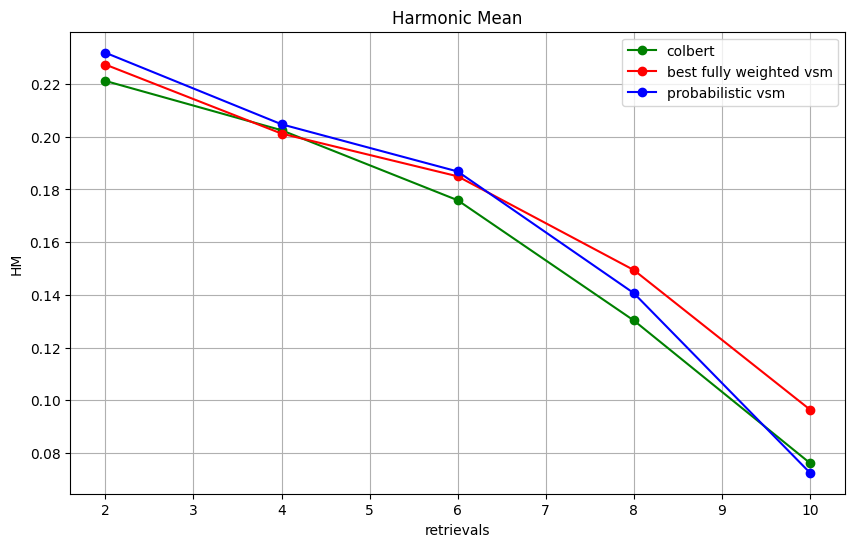

In [9]:
x=[2,4,6,8,10]
plt.figure(figsize=(10, 6))
plt.title('Harmonic Mean')
plt.plot(x, colbert_hm,marker='o', color='green',label='colbert')
plt.plot(x,vsm1_hm,marker='o', color='red', label='best fully weighted vsm')
plt.plot(x,vsm2_hm,marker='o', color='blue', label='probabilistic vsm')
plt.plot
plt.legend()
plt.grid(True)
plt.xlabel('retrievals')
plt.ylabel('HM')
plt.show()

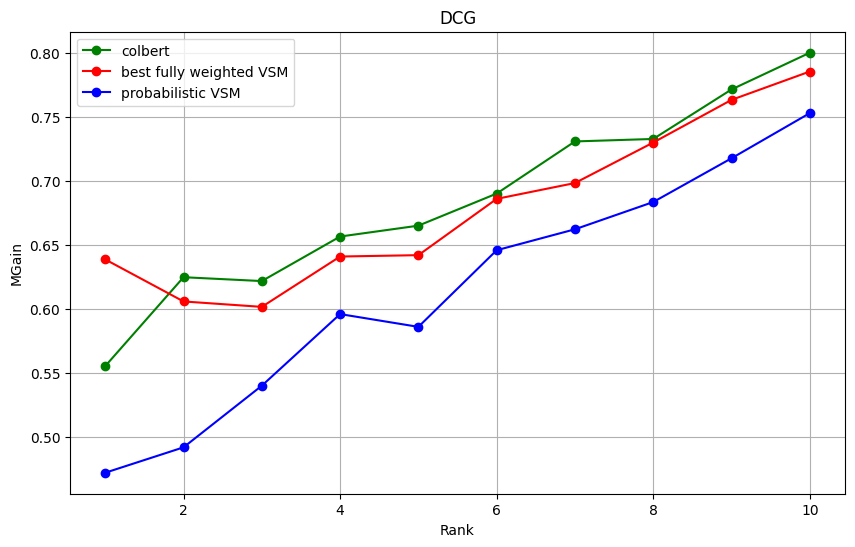

In [10]:

x=list(range(1,len(vsm1_dcg)+1))
plt.figure(figsize=(10, 6))
plt.title('DCG')

plt.plot(x, colbert_dcg,marker='o', color='green',label='colbert')
plt.plot(x,vsm1_dcg,marker='o', color='red', label='best fully weighted VSM')
plt.plot(x,vsm2_dcg,marker='o', color='blue', label='probabilistic VSM')
plt.plot
plt.legend()
plt.grid(True)
plt.xlabel('Rank')
plt.ylabel('MGain')
plt.show()
